import libraries

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import dataset

In [5]:
data = pd.read_csv(Path('data/CC.csv'))

print first 10 values

In [7]:
data.head(10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


print count of labels in target column

In [9]:
print(data["TENURE"].value_counts())

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


count number of null values

In [11]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns  = ['Null Count']
nulls.index.name  = 'Feature'
print(nulls)

                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
TENURE                                     0
PURCHASES_FREQUENCY                        0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
ONEOFF_PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                           0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
PAYMENTS                                   0
CUST_ID                                    0


replace null values with mean value

In [12]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

count number of null values

In [13]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns  = ['Null Count']
nulls.index.name  = 'Feature'
print(nulls)

                                  Null Count
Feature                                     
TENURE                                     0
PRC_FULL_PAYMENT                           0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
PURCHASES_FREQUENCY                        0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                               0
PAYMENTS                                   0
MINIMUM_PAYMENTS                           0
CUST_ID                                    0


print data shape

In [15]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]
print(x.shape,y.shape)

(8950, 16) (8950,)


Use the elbow method to find a good number of clusters with the KMeans algorithm

In [16]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[393060974446.5349, 279296544720.109, 232802164165.40973, 206824661515.15485, 182174458590.89627, 162467723743.24792]


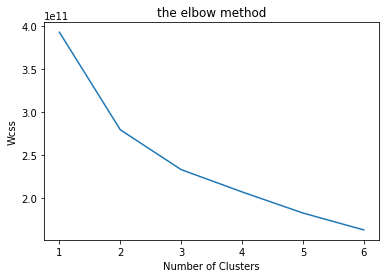

In [17]:
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [19]:
km = KMeans(n_clusters=3)
km.fit(x)
y_cluster_kmeans= km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.46554377514360906


Apply PCA on the same dataset.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x_scaler = scaler.transform(x)
pca = PCA(3)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,data[['TENURE']]],axis=1)
print(finaldf)

             0         1         2  TENURE
0    -1.718893 -1.072940  0.535698      12
1    -1.169306  2.509320  0.627981      12
2     0.938414 -0.382600  0.161220      12
3    -0.907503  0.045859  1.521693      12
4    -1.637830 -0.684975  0.425697      12
5     0.219125 -0.778498 -1.090785      12
6     6.346882 -0.698184  2.050005      12
7     0.245607 -1.289271 -1.806283      12
8    -0.477752 -0.459384  0.251567      12
9    -0.596618 -0.363943  2.014311      12
10    0.510145 -1.311825 -1.914145      12
11   -0.717459 -0.783016  1.204453      12
12    1.957559 -1.322850 -0.632792      12
13    1.532676 -0.879361 -0.735823      12
14   -1.627033  0.236755  0.253009      12
15    0.759643  1.848126 -1.155931      12
16   -1.889229  0.946133  0.359116       8
17   -0.986854 -1.574914  0.756892      12
18    0.464564 -0.094505 -0.494947      12
19    0.747317  0.051189 -2.925106      12
20   -0.181353 -0.066074 -2.311204      12
21    5.514969  1.739415  0.039345      12
22    0.390

Calculate the silhouette score for the above clustering

In [21]:
km = KMeans(n_clusters=3)
km.fit(x_pca)
y_cluster_kmeans= km.predict(x_pca)
from sklearn import metrics
score = metrics.silhouette_score(x_pca, y_cluster_kmeans)
print(score)

0.3815771061577699
